In [2]:
import pandas as pd 
df = pd.DataFrame([1, 2, 3, 4, 5], index=[100, 29, 234, 1, 150],
                  columns=['A'])
df.sort_index()

,A
1,4
29,2
100,1
150,5
234,3


In [3]:
df.sort_index(ascending=False)

,A
234,3
150,5
100,1
29,2
1,4


In [5]:
df = pd.DataFrame({"a": [1, 2, 3, 4]}, index=['A', 'b', 'C', 'd'])
df.sort_index(key=lambda x: x.str.lower())

,a
A,1
b,2
C,3
d,4


In [7]:
df.sort_index(key=lambda x: x.str.lower())

,a
A,1
b,2
C,3
d,4


In [20]:

import numpy as np
df = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, np.nan, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
    'col4': ['a', 'B', 'c', 'D', 'e', 'F']
})
df

,col1,col2,col3,col4
0,A,2.0,0,a
1,A,1.0,1,B
2,B,9.0,9,c
3,NaN,NaN,4,D
4,D,7.0,2,e
5,C,4.0,3,F


In [22]:
df.sort_values(by='col2', ascending=False ,na_position='first')

,col1,col2,col3,col4
3,NaN,NaN,4,D
2,B,9.0,9,c
4,D,7.0,2,e
5,C,4.0,3,F
0,A,2.0,0,a
1,A,1.0,1,B


In [35]:
df_single_level_cols = pd.DataFrame([[0, 1], [2, 3]],
                                    index=['cat', 'dog'],
                                    columns=['weight', 'heigh'])

In [29]:
df_single_level_cols

,weight,heigh
cat,0,1
dog,2,3


In [30]:
df_single_level_cols.stack()

cat  weight    0
     heigh     1
dog  weight    2
     heigh     3
dtype: int64

In [41]:
multicol1 = pd.MultiIndex.from_tuples([('weight', 'kg'),
                                       ('weight', 'pounds')])
df_multi_level_cols1 = pd.DataFrame([[1, 2], [2, 4]],
                                    index=['cat', 'dog'],
                                    columns=multicol1)

In [42]:
multicol1

MultiIndex([('weight',     'kg'),
            ('weight', 'pounds')],
           )

In [43]:
df_multi_level_cols1 

weight       
        kg pounds
cat      1      2
dog      2      4

In [44]:
df_multi_level_cols1.stack()

weight
cat kg           1
    pounds       2
dog kg           2
    pounds       4

In [45]:
multicol2 = pd.MultiIndex.from_tuples([('weight', 'kg'),
                                       ('height', 'm')])
df_multi_level_cols2 = pd.DataFrame([[1.0, 2.0], [3.0, 4.0]],
                                    index=['cat', 'dog'],
                                    columns=multicol2)

In [46]:
df_multi_level_cols2

,weight,height
,kg,m
cat,1.0,2.0
dog,3.0,4.0


In [47]:
df_multi_level_cols2.stack()

height  weight
cat kg     NaN     1.0
    m      2.0     NaN
dog kg     NaN     3.0
    m      4.0     NaN

In [48]:
df = pd.DataFrame([('falcon', 'bird', 389.0),
                   ('parrot', 'bird', 24.0),
                   ('lion', 'mammal', 80.5),
                   ('monkey', 'mammal', np.nan)],
                  columns=['name', 'class', 'max_speed'],
                  index=[0, 2, 3, 1])
df

,name,class,max_speed
0,falcon,bird,389.0
2,parrot,bird,24.0
3,lion,mammal,80.5
1,monkey,mammal,NaN


In [55]:
df.take([2,0])

,name,class,max_speed
3,lion,mammal,80.5
0,falcon,bird,389.0


In [56]:
df.take([1,2], axis=1)

,class,max_speed
0,bird,389.0
2,bird,24.0
3,mammal,80.5
1,mammal,NaN


In [57]:
df.take([-1,-2])

,name,class,max_speed
1,monkey,mammal,NaN
3,lion,mammal,80.5


In [58]:
df = pd.DataFrame({'col1': [1, 2],
                   'col2': [0.5, 0.75]},
                  index=['row1', 'row2'])
df

,col1,col2
row1,1,0.50
row2,2,0.75


In [59]:
df.to_dict('Series')

{'col1': row1    1
 row2    2
 Name: col1, dtype: int64,
 'col2': row1    0.50
 row2    0.75
 Name: col2, dtype: float64}

In [60]:
df.to_dict('split')

{'index': ['row1', 'row2'],
 'columns': ['col1', 'col2'],
 'data': [[1, 0.5], [2, 0.75]]}

In [61]:
df.to_dict('records')

[{'col1': 1, 'col2': 0.5}, {'col1': 2, 'col2': 0.75}]

In [63]:
df.to_dict('index')

{'row1': {'col1': 1, 'col2': 0.5}, 'row2': {'col1': 2, 'col2': 0.75}}

In [64]:
df.to_dict('tight')

{'index': ['row1', 'row2'],
 'columns': ['col1', 'col2'],
 'data': [[1, 0.5], [2, 0.75]],
 'index_names': [None],
 'column_names': [None]}

In [65]:
from collections import OrderedDict, defaultdict
df.to_dict(into=OrderedDict)
OrderedDict([('col1', OrderedDict([('row1', 1), ('row2', 2)])),
             ('col2', OrderedDict([('row1', 0.5), ('row2', 0.75)]))])

OrderedDict([('col1', OrderedDict([('row1', 1), ('row2', 2)])),
             ('col2', OrderedDict([('row1', 0.5), ('row2', 0.75)]))])

SyntaxError: invalid syntax (3586805356.py, line 3)

In [67]:
dd = defaultdict(list)
df.to_dict('records', into=dd)
[defaultdict(<class 'list'>, {'col1': 1, 'col2': 0.5}),
 defaultdict(<class 'list'>, {'col1': 2, 'col2': 0.75})]

SyntaxError: invalid syntax (3586805356.py, line 3)

In [68]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]},
                  index=['a', 'b', 'c'])  
df.to_hdf('data.h5', key='df', mode='w')  

In [69]:
s = pd.Series([1, 2, 3, 4])  
s.to_hdf('data.h5', key='s')  

In [71]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]},
                  index=['a', 'b', 'c'])
df

,A,B
a,1,4
b,2,5
c,3,6


In [72]:
df.to_hdf('data.h5', key='df', mode='w')  

In [74]:
pd.read_hdf('data.h5', 'df')  


,A,B
a,1,4
b,2,5
c,3,6


In [76]:
df = pd.DataFrame(
    data={"animal_1": ["elk", "pig"], "animal_2": ["dog", "quetzal"]}
)
df

,animal_1,animal_2
0,elk,dog
1,pig,quetzal


In [77]:
print(df.to_markdown())

|    | animal_1   | animal_2   |
|---:|:-----------|:-----------|
|  0 | elk        | dog        |
|  1 | pig        | quetzal    |


In [78]:
print(df.to_markdown(tablefmt="grid"))

+----+------------+------------+
|    | animal_1   | animal_2   |
+====+============+============+
|  0 | elk        | dog        |
+----+------------+------------+
|  1 | pig        | quetzal    |
+----+------------+------------+


In [80]:
pd.DataFrame({"A": [1, 2], "B": [3, 4]}).to_numpy()


array([[1, 3],
       [2, 4]], dtype=int64)

In [81]:
pd.DataFrame({'A':[1,2], 'B':[3,4]})

,A,B
0,1,3
1,2,4


In [82]:
df.to_numpy()

array([['elk', 'dog'],
       ['pig', 'quetzal']], dtype=object)

In [83]:
df['C'] = pd.date_range('2000', periods=2)



In [84]:
df.to_numpy()

array([['elk', 'dog', Timestamp('2000-01-01 00:00:00')],
       ['pig', 'quetzal', Timestamp('2000-01-02 00:00:00')]], dtype=object)

In [85]:
idx = pd.to_datetime(
    [
        "2001-03-31 00:00:00",
        "2002-05-31 00:00:00",
        "2003-08-31 00:00:00",
    ]
)

In [86]:
idx

DatetimeIndex(['2001-03-31', '2002-05-31', '2003-08-31'], dtype='datetime64[ns]', freq=None)

In [87]:
idx.to_perioddelta

<bound method DatetimeIndex.to_perioddelta of DatetimeIndex(['2001-03-31', '2002-05-31', '2003-08-31'], dtype='datetime64[ns]', freq=None)>

In [88]:
idx.to_period('m')

PeriodIndex(['2001-03', '2002-05', '2003-08'], dtype='period[M]')

In [89]:
idx.to_period('y')

PeriodIndex(['2001', '2002', '2003'], dtype='period[A-DEC]')

In [93]:
df = pd.DataFrame({'A': [1, 2], 'B': [0.5, 0.75]},
                  index=['a', 'b'])
df

,A,B
a,1,0.50
b,2,0.75


In [97]:
df.index = df.index.rename("I")
df.to_records()

rec.array([('a', 1, 0.5 ), ('b', 2, 0.75)],
          dtype=[('I', 'O'), ('A', '<i8'), ('B', '<f8')])

In [98]:
%recall

In [ ]:
[('a', 1, 0.5 ) ('b', 2, 0.75)]

In [100]:
df.to_records(index=False)

rec.array([(1, 0.5 ), (2, 0.75)],
          dtype=[('A', '<i8'), ('B', '<f8')])

In [101]:
df.to_records(column_dtypes={'a':'int32'})

rec.array([('a', 1, 0.5 ), ('b', 2, 0.75)],
          dtype=[('I', 'O'), ('A', '<i8'), ('B', '<f8')])

In [104]:
df = pd.DataFrame([('falcon', 'bird', 389.0, 2),
                   ('parrot', 'bird', 24.0, 2),
                   ('lion', 'mammal', 80.5, 4),
                   ('monkey', 'mammal', np.nan, 4)],
                  columns=['name', 'class', 'max_speed',
                           'num_legs'])
df

,name,class,max_speed,num_legs
0,falcon,bird,389.0,2
1,parrot,bird,24.0,2
2,lion,mammal,80.5,4
3,monkey,mammal,NaN,4


In [105]:
df.to_xarray()

<xarray.Dataset>
Dimensions:    (index: 4)
Coordinates:
  * index      (index) int64 0 1 2 3
Data variables:
    name       (index) object 'falcon' 'parrot' 'lion' 'monkey'
    class      (index) object 'bird' 'bird' 'mammal' 'mammal'
    max_speed  (index) float64 389.0 24.0 80.5 nan
    num_legs   (index) int64 2 2 4 4

In [107]:
df['max_speed'].to_xarray()

<xarray.DataArray 'max_speed' (index: 4)>
array([389. ,  24. ,  80.5,   nan])
Coordinates:
  * index    (index) int64 0 1 2 3

In [108]:
dates = pd.to_datetime(['2018-01-01', '2018-01-01',
                        '2018-01-02', '2018-01-02'])
df_multiindex = pd.DataFrame({'date': dates,
                              'animal': ['falcon', 'parrot',
                                         'falcon', 'parrot'],
                              'speed': [350, 18, 361, 15]})
df_multiindex = df_multiindex.set_index(['date', 'animal'])

In [110]:
dates = pd.to_datetime(['2018-01-01', '2018-01-01',
                        '2018-01-02', '2018-01-02'])
dates

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-02', '2018-01-02'], dtype='datetime64[ns]', freq=None)

In [111]:
df_multiindex = pd.DataFrame({'date': dates,
                              'animal': ['falcon', 'parrot',
                                         'falcon', 'parrot'],
                              'speed': [350, 18, 361, 15]})
df_multiindex

,date,animal,speed
0,2018-01-01,falcon,350
1,2018-01-01,parrot,18
2,2018-01-02,falcon,361
3,2018-01-02,parrot,15


In [112]:
df_multiindex.to_xarray()

<xarray.Dataset>
Dimensions:  (index: 4)
Coordinates:
  * index    (index) int64 0 1 2 3
Data variables:
    date     (index) datetime64[ns] 2018-01-01 2018-01-01 2018-01-02 2018-01-02
    animal   (index) object 'falcon' 'parrot' 'falcon' 'parrot'
    speed    (index) int64 350 18 361 15

In [113]:
df = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
df

,A,B
0,0,1
1,1,2
2,2,3


In [114]:
df.transform(lambda x : x+1)

,A,B
0,1,2
1,2,3
2,3,4


In [118]:
s= pd.Series(range(3))
s

0    0
1    1
2    2
dtype: int64

In [120]:
s.transform([np.sqrt, np.exp])

,sqrt,exp
0,0.000000,1.000000
1,1.000000,2.718282
2,1.414214,7.389056


In [121]:
df = pd.DataFrame({
    "Date": [
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05",
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05"],
    "Data": [5, 8, 6, 1, 50, 100, 60, 120],
})
df

,Date,Data
0,2015-05-08,5
1,2015-05-07,8
2,2015-05-06,6
3,2015-05-05,1
4,2015-05-08,50
5,2015-05-07,100
6,2015-05-06,60
7,2015-05-05,120


In [122]:
df.groupby('Date')['Date'].transform('sum')

0    2015-05-082015-05-08
1    2015-05-072015-05-07
2    2015-05-062015-05-06
3    2015-05-052015-05-05
4    2015-05-082015-05-08
5    2015-05-072015-05-07
6    2015-05-062015-05-06
7    2015-05-052015-05-05
Name: Date, dtype: object

In [123]:
df.groupby

<bound method DataFrame.groupby of          Date  Data
0  2015-05-08     5
1  2015-05-07     8
2  2015-05-06     6
3  2015-05-05     1
4  2015-05-08    50
5  2015-05-07   100
6  2015-05-06    60
7  2015-05-05   120>

In [125]:
df = pd.DataFrame({
    "c": [1, 1, 1, 2, 2, 2, 2],
    "type": ["m", "n", "o", "m", "m", "n", "n"]
})
df

,c,type
0,1,m
1,1,n
2,1,o
3,2,m
4,2,m
5,2,n
6,2,n


In [126]:
df['size'] = df.groupby('c')['type'].transform(len)
df

,c,type,size
0,1,m,3
1,1,n,3
2,1,o,3
3,2,m,4
4,2,m,4
5,2,n,4
6,2,n,4


In [127]:
df['size']

0    3
1    3
2    3
3    4
4    4
5    4
6    4
Name: size, dtype: int64

In [2]:
import pandas as pd 
import numpy as np
d1 = {'col1': [1, 2], 'col2': [3, 4]}
df1 = pd.DataFrame(data=d1)
df1

,col1,col2
0,1,3
1,2,4


In [3]:
d1

{'col1': [1, 2], 'col2': [3, 4]}

In [7]:
df1_transposed = df1.T

In [9]:
df1.transpose()

,0,1
col1,1,2
col2,3,4


In [10]:
df1.dtypes

col1    int64
col2    int64
dtype: object

In [11]:
df1_transposed.dtypes

0    int64
1    int64
dtype: object

In [14]:
d2 = {'name': ['Alice', 'Bob'],
      'score': [9.5, 8],
      'employed': [False, True],
      'kids': [0, 0]}
df2 = pd.DataFrame(data=d2)
df2

,name,score,employed,kids
0,Alice,9.5,False,0
1,Bob,8.0,True,0


In [17]:
df2_transposed = df2.T

    df2_transposed

In [18]:
df2_transposed

,0,1
name,Alice,Bob
score,9.5,8.0
employed,False,True
kids,0,0


In [19]:
df2.dtypes

name         object
score       float64
employed       bool
kids          int64
dtype: object

In [20]:
df = pd.DataFrame({'A': ['a', 'b', 'c', 'd', 'e'],
                   'B': ['f', 'g', 'h', 'i', 'j'],
                   'C': ['k', 'l', 'm', 'n', 'o']},
                  index=[1, 2, 3, 4, 5])
df

,A,B,C
1,a,f,k
2,b,g,l
3,c,h,m
4,d,i,n
5,e,j,o


In [21]:
df.truncate(before=2, after = 4)

,A,B,C
2,b,g,l
3,c,h,m
4,d,i,n


In [25]:
df.truncate(before='A' , after = 'B' , axis = 'columns')

,A,B
1,a,f
2,b,g
3,c,h
4,d,i
5,e,j


In [26]:
df['A'].truncate(before = 2, after= 3)

2    b
3    c
Name: A, dtype: object

In [27]:
df.truncate(before=pd.Timestamp('2016-01-05'),
            after=pd.Timestamp('2016-01-10')).tail()

TypeError: '<' not supported between instances of 'int' and 'Timestamp'

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
df

,A,B
0,0,1
1,1,2
2,2,3


In [9]:
df.transform(lambda a: a + 1.2)

,A,B
0,1.2,2.2
1,2.2,3.2
2,3.2,4.2


In [10]:
df = pd.DataFrame({
    "c": [1, 1, 1, 2, 2, 2, 2],
    "type": ["m", "n", "o", "m", "m", "n", "n"]
})
df

,c,type
0,1,m
1,1,n
2,1,o
3,2,m
4,2,m
5,2,n
6,2,n


In [11]:
df['size'] = df.groupby('c')['type'].transform(len)
df

,c,type,size
0,1,m,3
1,1,n,3
2,1,o,3
3,2,m,4
4,2,m,4
5,2,n,4
6,2,n,4


In [12]:
df['size'] = df.groupby('c')['type'].transform(sum)
df

,c,type,size
0,1,m,mno
1,1,n,mno
2,1,o,mno
3,2,m,mmnn
4,2,m,mmnn
5,2,n,mmnn
6,2,n,mmnn


In [17]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)
s

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [22]:
s.unstack(level=0)
     

,one,two
a,1.0,3.0
b,2.0,4.0


In [23]:

     df = s.unstack(level=0)
df.unstack()

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [24]:
df.unstack

<bound method DataFrame.unstack of    one  two
a  1.0  3.0
b  2.0  4.0>

In [25]:
df = pd.DataFrame({'person_id': [0, 1, 2, 3],
                  'age': [21, 25, 62, 43],
                  'height': [1.61, 1.87, 1.49, 2.01]}
                 ).set_index('person_id')
df

,age,height
person_id,,
0,21,1.61
1,25,1.87
2,62,1.49
3,43,2.01


In [28]:
df.var()

age       352.916667
height      0.056367
dtype: float64

In [29]:
df.age.mean()

37.75

In [30]:
df.height.mean()

1.745

In [35]:
d = {'num_legs': [4, 4, 2, 2],
     'num_wings': [0, 0, 2, 2],
     'class': ['mammal', 'mammal', 'mammal', 'bird'],
     'animal': ['cat', 'dog', 'bat', 'penguin'],
     'locomotion': ['walks', 'walks', 'flies', 'walks']}
df = pd.DataFrame(data=d)
df = df.set_index(['class', 'animal', 'locomotion'])
df

num_legs  num_wings
class  animal  locomotion                     
mammal cat     walks              4          0
       dog     walks              4          0
       bat     flies              2          2
bird   penguin walks              2          2

In [42]:
df.xs(('mammal','cat', 'walks'))

num_legs     4
num_wings    0
Name: (mammal, cat, walks), dtype: int64

In [1]:
df = pd.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6],
    'signups': [5, 5, 6, 12, 14, 13],
    'visits': [20, 42, 28, 62, 81, 50],
}, index=pd.date_range(start='2018/01/01', end='2018/07/01',
                       freq='M'))
ax = df.plot.area()

NameError: name 'pd' is not defined

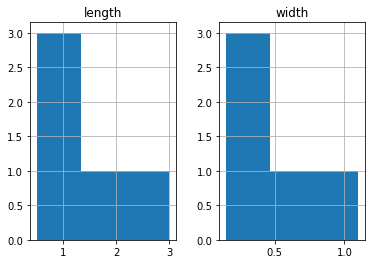

In [5]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'length': [1.5, 0.5, 1.2, 0.9, 3],
    'width': [0.7, 0.2, 0.15, 0.2, 1.1]
    }, index=['pig', 'rabbit', 'duck', 'chicken', 'horse'])
hist = df.hist(bins=3)

In [9]:
df = pd.DataFrame({
    'length': [1.5, 0.5, 1.2, 0.9, 3],
    'width': [0.7, 0.2, 0.15, 0.2, 1.1]})
df

,length,width
0,1.5,0.70
1,0.5,0.20
2,1.2,0.15
3,0.9,0.20
4,3.0,1.10


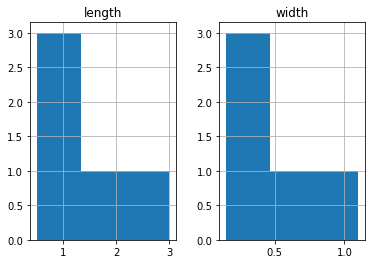

In [10]:
hist = df.hist(bins=3)

In [12]:
df = pd.DataFrame({'consumption': [10.51, 103.11, 55.48],
                   'co2_emissions': [37.2, 19.66, 1712]},
                   index=['Pork', 'Wheat Products', 'Beef'])
df

,consumption,co2_emissions
Pork,10.51,37.20
Wheat Products,103.11,19.66
Beef,55.48,1712.00


In [13]:
df.idxmax()

consumption      Wheat Products
co2_emissions              Beef
dtype: object

In [14]:
df.idxmax(axis='columns')

Pork              co2_emissions
Wheat Products      consumption
Beef              co2_emissions
dtype: object

In [15]:
df.idxmin()

consumption                Pork
co2_emissions    Wheat Products
dtype: object

In [16]:
df.idxmin(axis='columns')

Pork                consumption
Wheat Products    co2_emissions
Beef                consumption
dtype: object

In [17]:
df = pd.DataFrame({"A": ["a", 1, 2, 3]})
df = df.iloc[1:]
df

,A
1,1
2,2
3,3


In [19]:
df = df.iloc[1:]
df

,A
3,3


In [21]:
df.dtypes

A    object
dtype: object

In [22]:
df.infer_objects(.dtypes

SyntaxError: invalid syntax (623740412.py, line 1)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df
     

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


In [4]:
df.rolling(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,NaN
4,NaN


In [5]:
df.rolling(2)

Rolling [window=2,center=False,axis=0,method=single]

In [6]:
df_time = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                       index = [pd.Timestamp('20130101 09:00:00'),
                                pd.Timestamp('20130101 09:00:02'),
                                pd.Timestamp('20130101 09:00:03'),
                                pd.Timestamp('20130101 09:00:05'),
                                pd.Timestamp('20130101 09:00:06')])
df_time

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


In [7]:
df_time.rolling('2s').sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


In [8]:
df = pd.DataFrame([(.21, .32), (.01, .67), (.66, .03), (.21, .18)],
                  columns=['dogs', 'cats'])
df

,dogs,cats
0,0.21,0.32
1,0.01,0.67
2,0.66,0.03
3,0.21,0.18


In [22]:
df.round(0)

,dogs,cats
0,0.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,0.0


In [16]:
df.round({'dogs': 1, 'cats': 0})

,dogs,cats
0,0.2,0.0
1,0.0,1.0
2,0.7,0.0
3,0.2,0.0


In [23]:
decimals = pd.Series([0, 1], index=['cats', 'dogs'])
df.round(decimals)

,dogs,cats
0,0.2,0.0
1,0.0,1.0
2,0.7,0.0
3,0.2,0.0


In [24]:
df = pd.DataFrame({'angles': [0, 3, 4],
                   'degrees': [360, 180, 360]},
                  index=['circle', 'triangle', 'rectangle'])
df

,angles,degrees
circle,0,360
triangle,3,180
rectangle,4,360


In [29]:
df_multindex = pd.DataFrame({'angles': [0, 3, 4, 4, 5, 6],
                             'degrees': [360, 180, 360, 360, 540, 720]},
                            index=[['A', 'A', 'A', 'B', 'B', 'B'],
                                   ['circle', 'triangle', 'rectangle',
                                    'square', 'pentagon', 'hexagon']])
df_multindex

angles  degrees
A circle          0      360
  triangle        3      180
  rectangle       4      360
B square          4      360
  pentagon        5      540
  hexagon         6      720

In [32]:
df.div(df_multindex, level=1, fill_value=0)

angles  degrees
A circle        NaN      1.0
  triangle      1.0      1.0
  rectangle     1.0      1.0
B square        0.0      0.0
  pentagon      0.0      0.0
  hexagon       0.0      0.0

In [38]:
df.div(df_multindex,level = 1 , fill_value = 2)

angles   degrees
A circle          NaN  1.000000
  triangle   1.000000  1.000000
  rectangle  1.000000  1.000000
B square     0.500000  0.005556
  pentagon   0.400000  0.003704
  hexagon    0.333333  0.002778

In [45]:
df.sub([1,2])

,angles,degrees
circle,-1,358
triangle,2,178
rectangle,3,358


In [48]:
df.div(2)

,angles,degrees
circle,0.0,180.0
triangle,1.5,90.0
rectangle,2.0,180.0


In [49]:
df = pd.DataFrame({'num_legs': [2, 4, 8, 0],
                   'num_wings': [2, 0, 0, 0],
                   'num_specimen_seen': [10, 2, 1, 8]},
                  index=['falcon', 'dog', 'spider', 'fish'])
df

,num_legs,num_wings,num_specimen_seen
falcon,2,2,10
dog,4,0,2
spider,8,0,1
fish,0,0,8


In [51]:
df['num_legs'].sample(n=3, random_state=1)

fish      0
spider    8
falcon    2
Name: num_legs, dtype: int64

In [55]:
df.sample(frac=2
          , replace=2, random_state=1)

,num_legs,num_wings,num_specimen_seen
dog,4,0,2
fish,0,0,8
falcon,2,2,10
falcon,2,2,10
fish,0,0,8
dog,4,0,2
fish,0,0,8
dog,4,0,2


In [56]:
df = pd.DataFrame({'a': [1, 2] * 3,
                   'b': [True, False] * 3,
                   'c': [1.0, 2.0] * 3})
df

,a,b,c
0,1,True,1.0
1,2,False,2.0
2,1,True,1.0
3,2,False,2.0
4,1,True,1.0
5,2,False,2.0


In [57]:
df.select_dtypes(include='bool')

,b
0,True
1,False
2,True
3,False
4,True
5,False


In [62]:
df.select_dtypes(exclude='bool')

,a,c
0,1,1.0
1,2,2.0
2,1,1.0
3,2,2.0
4,1,1.0
5,2,2.0


In [63]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df

,A,B
0,1,4
1,2,5
2,3,6


In [74]:
df.set_axis(['i', 'ii'], axis='columns', inplace=True)
df

,i,ii
0,1,4
1,2,5
2,3,6


In [75]:
df = pd.DataFrame({'month': [1, 4, 7, 10],
                   'year': [2012, 2014, 2013, 2014],
                   'sale': [55, 40, 84, 31]})
df

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


In [76]:
df.set_index('month' , 'year')

C:\Users\91980\AppData\Local\Temp\ipykernel_17016\114303771.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  df.set_index('month' , 'year')


,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [78]:

df = pd.DataFrame({'A': [4, 5, 6], 'B': [4, 1, 1]})
df.nunique()

A    3
B    2
dtype: int64

In [80]:
df.nunique(axis=1)

0    1
1    2
2    2
dtype: int64

In [81]:
s= pd.Series([90,91,85])
s

0    90
1    91
2    85
dtype: int64

In [82]:
s.pct_change()

0         NaN
1    0.011111
2   -0.065934
dtype: float64

In [83]:
s.pct_change(periods=2)

0         NaN
1         NaN
2   -0.055556
dtype: float64

In [84]:
    s = pd.Series([90, 91, None, 85])
s

0    90.0
1    91.0
2     NaN
3    85.0
dtype: float64

In [86]:
s.pct_change(fill_method='ffill')

0         NaN
1    0.011111
2    0.000000
3   -0.065934
dtype: float64

In [87]:
df = pd.DataFrame({
    'FR': [4.0405, 4.0963, 4.3149],
    'GR': [1.7246, 1.7482, 1.8519],
    'IT': [804.74, 810.01, 860.13]},
    index=['1980-01-01', '1980-02-01', '1980-03-01'])
df

,FR,GR,IT
1980-01-01,4.0405,1.7246,804.74
1980-02-01,4.0963,1.7482,810.01
1980-03-01,4.3149,1.8519,860.13


In [88]:
df.pct_change()

,FR,GR,IT
1980-01-01,NaN,NaN,NaN
1980-02-01,0.013810,0.013684,0.006549
1980-03-01,0.053365,0.059318,0.061876


In [89]:
pd.Series([], dtype="float64").prod()


1.0

In [96]:
pd.Series([10,20])

0    10
1    20
dtype: int64

In [97]:
pd.Series([], dtype="float64").prod(min_count=1)

nan

In [98]:
pd.Series([np.nan]).prod()

1.0

In [99]:
pd.Series([np.nan]).prod(min_count=1)

nan

In [100]:
df = pd.DataFrame(np.array([[1, 1], [2, 10], [3, 100], [4, 100]]),
                  columns=['a', 'b'])
df.quantile(.1)


a    1.3
b    3.7
Name: 0.1, dtype: float64

In [101]:
df

,a,b
0,1,1
1,2,10
2,3,100
3,4,100


In [104]:
df.quantile(.5)

a     2.5
b    55.0
Name: 0.5, dtype: float64

In [105]:
df = pd.DataFrame(data={'Animal': ['cat', 'penguin', 'dog',
                                   'spider', 'snake'],
                        'Number_legs': [4, 2, 4, 8, np.nan]})
df

,Animal,Number_legs
0,cat,4.0
1,penguin,2.0
2,dog,4.0
3,spider,8.0
4,snake,NaN


In [106]:
df['default_rank'] = df['Number_legs'].rank()
df['max_rank'] = df['Number_legs'].rank(method='max')
df['NA_bottom'] = df['Number_legs'].rank(na_option='bottom')
df['pct_rank'] = df['Number_legs'].rank(pct=True)
df

,Animal,Number_legs,default_rank,max_rank,NA_bottom,pct_rank
0,cat,4.0,2.5,3.0,2.5,0.625
1,penguin,2.0,1.0,1.0,1.0,0.250
2,dog,4.0,2.5,3.0,2.5,0.625
3,spider,8.0,4.0,4.0,4.0,1.000
4,snake,NaN,NaN,NaN,5.0,NaN


In [110]:
df.pct_change

<bound method NDFrame.pct_change of     Animal  Number_legs  default_rank  max_rank  NA_bottom  pct_rank
0      cat          4.0           2.5       3.0        2.5     0.625
1  penguin          2.0           1.0       1.0        1.0     0.250
2      dog          4.0           2.5       3.0        2.5     0.625
3   spider          8.0           4.0       4.0        4.0     1.000
4    snake          NaN           NaN       NaN        5.0       NaN>

In [112]:
df = pd.DataFrame({'person_id': [0, 1, 2, 3],
                  'age': [21, 25, 62, 43],
                  'height': [1.61, 1.87, 1.49, 2.01]}
                 ).set_index('person_id')
df

,age,height
person_id,,
0,21,1.61
1,25,1.87
2,62,1.49
3,43,2.01


In [113]:
df.std()

age       18.786076
height     0.237417
dtype: float64

In [114]:
i = pd.date_range('2018-04-09', periods=4, freq='12H')
ts = pd.DataFrame({'A': [1, 2, 3, 4]}, index=i)
ts

,A
2018-04-09 00:00:00,1
2018-04-09 12:00:00,2
2018-04-10 00:00:00,3
2018-04-10 12:00:00,4


In [116]:
ts.at_time('00:00')

,A
2018-04-09,1
2018-04-10,3


In [117]:
i = pd.date_range('2018-04-09', periods=4, freq='1D20min')
ts = pd.DataFrame({'A': [1, 2, 3, 4]}, index=i)
ts

,A
2018-04-09 00:00:00,1
2018-04-10 00:20:00,2
2018-04-11 00:40:00,3
2018-04-12 01:00:00,4


In [120]:
ts.between_time('0:45','0:15')

,A
2018-04-09 00:00:00,1
2018-04-12 01:00:00,4


In [121]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [122]:
df.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [123]:
df.drop_duplicates(subset=['brand'])

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5


In [125]:
df.drop_duplicates(subset=['style', 'brand'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


In [126]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [127]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [129]:
df.duplicated(keep='first')

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [130]:
df = pd.DataFrame({1: [10], 2: [20]})
df

,1,2
0,10,20


In [131]:
exactly_equal = pd.DataFrame({1:[10], 2 : [20]})

In [132]:
exactly_equal

,1,2
0,10,20


In [134]:
df.equals(exactly_equal)

True

In [135]:
different_columns_types = pd.DataFrame({1:[10] , 2 : [20]})

In [136]:
different_columns_types

,1,2
0,10,20


In [137]:
different_data_types = pd.DataFrame({1 : [10], 2 : [20]})

In [138]:
different_data_types

,1,2
0,10,20


In [139]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),
                  index=['mouse', 'rabbit'],
                  columns=['one', 'two', 'three'])
df

,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [140]:
df.filter(items=['one', 'three'])

,one,three
mouse,1,3
rabbit,4,6


In [142]:
df.filter(regex='e$', axis=1)

,one,three
mouse,1,3
rabbit,4,6


In [143]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df = pd.DataFrame({'http_status': [200, 200, 404, 404, 301],
                  'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
                  index=index)
df
        

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [144]:
new_index = ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10',
             'Chrome']

In [145]:
new_index

['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10', 'Chrome']

In [146]:
df.reindex(new_index)

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


In [149]:
df.reindex(new_index, fill_value=5)

,http_status,response_time
Safari,404,0.07
Iceweasel,5,5.00
Comodo Dragon,5,5.00
IE10,404,0.08
Chrome,200,0.02


In [150]:
df.reindex(new_index, fill_value='missing')

,http_status,response_time
Safari,404,0.07
Iceweasel,missing,missing
Comodo Dragon,missing,missing
IE10,404,0.08
Chrome,200,0.02


In [152]:
df.reindex(['http_status', 'user_agent'], axis="columns")

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


In [153]:
date_index = pd.date_range('1/1/2010', periods=6, freq='D')
df2 = pd.DataFrame({"prices": [100, 101, np.nan, 100, 89, 88]},
                   index=date_index)
df2

,prices
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0


In [155]:
date_index


DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06'],
              dtype='datetime64[ns]', freq='D')

In [156]:
date_index2 = pd.date_range('12/29/2009', periods=10, freq='D')
df2.reindex(date_index2)

,prices
2009-12-29,NaN
2009-12-30,NaN
2009-12-31,NaN
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0
2010-01-07,NaN


In [158]:
df1 = pd.DataFrame([[24.3, 75.7, 'high'],
                    [31, 87.8, 'high'],
                    [22, 71.6, 'medium'],
                    [35, 95, 'medium']],
                   columns=['temp_celsius', 'temp_fahrenheit',
                            'windspeed'],
                   index=pd.date_range(start='2014-02-12',
                                       end='2014-02-15', freq='D'))
df1

,temp_celsius,temp_fahrenheit,windspeed
2014-02-12,24.3,75.7,high
2014-02-13,31.0,87.8,high
2014-02-14,22.0,71.6,medium
2014-02-15,35.0,95.0,medium


In [161]:
df2 = pd.DataFrame([[28, 'low'],
                    [30, 'low'],
                    [35.1, 'medium']],
                   columns=['temp_celsius', 'windspeed'],
                   index=pd.DatetimeIndex(['2014-02-12', '2014-02-13',
                                           '2014-02-15']))
df2

,temp_celsius,windspeed
2014-02-12,28.0,low
2014-02-13,30.0,low
2014-02-15,35.1,medium


In [162]:
df2.reindex_like(df1)

,temp_celsius,temp_fahrenheit,windspeed
2014-02-12,28.0,NaN,low
2014-02-13,30.0,NaN,low
2014-02-14,NaN,NaN,NaN
2014-02-15,35.1,NaN,medium


In [163]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.rename(columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [167]:
df.rename(index={0:'x', 1:'y', 2:'z'})

,A,B
x,1,4
y,2,5
z,3,6


In [175]:
df.set_axis(['a', 'b', 'c'], axis='index')

,A,B
a,1,4
b,2,5
c,3,6


In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [3]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [5]:
df.pivot(index='foo', columns='bar')['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [6]:
df.pivot(index='foo', columns='bar', values= ['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [4]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


In [8]:
df.rolling(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,NaN
4,NaN


In [9]:
df = pd.DataFrame({'num_legs': [2, 4, 8, 0],
                   'num_wings': [2, 0, 0, 0],
                   'num_specimen_seen': [10, 2, 1, 8]},
                  index=['falcon', 'dog', 'spider', 'fish'])
df

,num_legs,num_wings,num_specimen_seen
falcon,2,2,10
dog,4,0,2
spider,8,0,1
fish,0,0,8


In [13]:
df.sample(frac=0.9, replace=True, random_state=1, )

,num_legs,num_wings,num_specimen_seen
dog,4,0,2
fish,0,0,8
falcon,2,2,10
falcon,2,2,10


In [14]:
df = pd.DataFrame(data={'Animal': ['cat', 'penguin', 'dog',
                                   'spider', 'snake'],
                        'Number_legs': [4, 2, 4, 8, np.nan]})
df

,Animal,Number_legs
0,cat,4.0
1,penguin,2.0
2,dog,4.0
3,spider,8.0
4,snake,NaN


In [15]:
df['default_rank'] = df['Number_legs'].rank()
df['max_rank'] = df['Number_legs'].rank(method='max')
df['NA_bottom'] = df['Number_legs'].rank(na_option='bottom')
df['pct_rank'] = df['Number_legs'].rank(pct=True)
df

,Animal,Number_legs,default_rank,max_rank,NA_bottom,pct_rank
0,cat,4.0,2.5,3.0,2.5,0.625
1,penguin,2.0,1.0,1.0,1.0,0.250
2,dog,4.0,2.5,3.0,2.5,0.625
3,spider,8.0,4.0,4.0,4.0,1.000
4,snake,NaN,NaN,NaN,5.0,NaN


In [16]:
df.default_rank

0    2.5
1    1.0
2    2.5
3    4.0
4    NaN
Name: default_rank, dtype: float64

In [3]:
import pandas as pd 
import numpy as np 
df = pd.DataFrame(
    data={"animal_1": ["elk", "pig"], "animal_2": ["dog", "quetzal"]}
)
df

,animal_1,animal_2
0,elk,dog
1,pig,quetzal


In [5]:
print(df.to_markdown())

|    | animal_1   | animal_2   |
|---:|:-----------|:-----------|
|  0 | elk        | dog        |
|  1 | pig        | quetzal    |


In [6]:
print(df.to_markdown(tablefmt='grid'))

+----+------------+------------+
|    | animal_1   | animal_2   |
+====+============+============+
|  0 | elk        | dog        |
+----+------------+------------+
|  1 | pig        | quetzal    |
+----+------------+------------+


In [13]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns=['A', 'B', 'C'])

df

,A,B,C
0,1,2,3
1,4,5,6


In [15]:
df.to_clipboard(sep=',')

In [16]:
df.to_clipboard(sep=',', index=False)

In [6]:
d = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
d

{'col1': [1, 2, 3], 'col2': [4, 5, 6]}

In [4]:
print(df.to_string())

AttributeError: 'dict' object has no attribute 'to_string'

In [11]:
import pandas as pd
df = pd.DataFrame({'animal': ['falcon', 'parrot', 'falcon',
                              'parrot'],
                   'speed': [350, 18, 361, 15  ]})
df

,animal,speed
0,falcon,350
1,parrot,18
2,falcon,361
3,parrot,15


In [12]:
df.to_stata('animal.dta')

In [13]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [14]:
df = pd.DataFrame({'name' : ['User 1', 'User 2', 'User 3']})
df

,name
0,User 1
1,User 2
2,User 3


In [15]:
df.to_sql('users', con=engine)


3

In [16]:
original_df = pd.DataFrame({"foo": range(5), "bar": range(5, 10)})  
original_df  


,foo,bar
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [17]:
original_df.to_pickle("./dummy.pkl")  

In [18]:
unpickled_df = pd.read_pickle("./dummy.pkl")  
unpickled_df  
   

,foo,bar
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [22]:
import numpy as np
df = pd.DataFrame([('falcon', 'bird', 389.0),
                   ('parrot', 'bird', 24.0),
                   ('lion', 'mammal', 80.5),
                   ('monkey', 'mammal', np.nan)],
                  columns=('name', 'class', 'max_speed'))
df

,name,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [31]:
df.pop('class')

KeyError: 'class'

In [32]:
df

""
0
1
2
3


In [33]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [39]:
df.isin([0,3])

,num_legs,num_wings
falcon,False,False
dog,False,True


In [37]:
~df.isin([0, 2])

,num_legs,num_wings
falcon,False,False
dog,True,False


In [38]:
df.isin({'num_legs': [0,3]})

,num_legs,num_wings
falcon,False,False
dog,False,False


In [2]:
import pandas as pd 
import numpy as np

In [4]:
pd.Index([1,2,3])

Int64Index([1, 2, 3], dtype='int64')

In [5]:
pd.Index(list('abc'))

Index(['a', 'b', 'c'], dtype='object')

In [6]:
pd.Series([1,2,3]).array

<PandasArray>
[1, 2, 3]
Length: 3, dtype: int64

In [12]:
s = pd.Series(pd.Categorical(['a', 'b', 'a']))
s.array

['a', 'b', 'a']
Categories (2, object): ['a', 'b']

In [11]:
s = pd.Series(['a', 'b' , 'c'])
s.array

<PandasArray>
['a', 'b', 'c']
Length: 3, dtype: object

In [14]:
pd.Series(pd.Categorical(['a', 'b' ,'a']))

0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

In [18]:
idx = pd.Index([1,5,7])
idx.has_duplicates

False

In [20]:
pd.Index([0,1,2,3]).all()

False

In [21]:
i = pd.Index([0,1,2])
i.any()

True

In [22]:
s = pd.Series({'Corn Flakes': 100.0, 'Almond Delight': 110.0,
               'Cinnamon Toast Crunch': 120.0, 'Cocoa Puff': 110.0})
s

Corn Flakes              100.0
Almond Delight           110.0
Cinnamon Toast Crunch    120.0
Cocoa Puff               110.0
dtype: float64

In [23]:
s.argmax()

2

In [24]:
s.argmin()

0

In [25]:
idx = pd.Index(['b', 'a', 'd', 'c'])
idx

Index(['b', 'a', 'd', 'c'], dtype='object')

In [26]:
order = idx.argsort()
order

array([1, 0, 3, 2], dtype=int64)

In [27]:
idx[order]

Index(['a', 'b', 'c', 'd'], dtype='object')

In [29]:
a = np.array([[1,4], [3,1]])
np.sort(a)

array([[1, 4],
       [1, 3]])

In [30]:
np.sort(a , axis= None)

array([1, 1, 3, 4])

In [34]:
np.sort(a, axis=0)

array([[1, 1],
       [3, 4]])

In [35]:
surnames =    ('Hertz',    'Galilei', 'Hertz')
first_names = ('Heinrich', 'Galileo', 'Gustav')
ind = np.lexsort((first_names, surnames))
ind

array([1, 2, 0], dtype=int64)

In [1]:
import pandas as pd
import numpy as np

In [8]:
x = np.array([3,2,1,4,8])
x

array([3, 2, 1, 4, 8])

In [10]:
np.argsort(x)

array([2, 1, 0, 3, 4], dtype=int64)

In [ ]:
from turtle import *
color('red', 'yellow')
begin_fill()
while True:
    forward(200)
    left(170)
    if abs(pos()) < 1:
        break
end_fill()
done()

In [ ]:
from turtle import Turtle , Screen
timmy_the_turtle = Turtle()
timmy_the_turtle.shape('turtle')
timmy_the_turtle.color('red')


screen = Screen()

In [ ]:
Turtle()

In [ ]:
x = np.zeros((3, 4, 5))
np.moveaxis(x, 0, -1).shape
(4, 5, 3)
np.moveaxis(x, -1, 0).shape
(5, 3, 4)
These all achieve the same result:

np.transpose(x).shape
(5, 4, 3)
np.swapaxes(x, 0, -1).shape
(5, 4, 3)
np.moveaxis(x, [0, 1], [-1, -2]).shape
(5, 4, 3)
np.moveaxis(x, [0, 1, 2], [-1, -2, -3]).shape
(5, 4, 3)

In [ ]:
x = np.zeros((3,4,5))
x